In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
sns.set(rc={'figure.figsize':(12,10)})


In [2]:
data = pd.read_csv("K:/MS MIS/Fall 2021/Machine Learning/Data/bank-additional/bank-additional/bank-additional-full.csv", sep=";")


## Exploratory Analysis

In [3]:
# checking the features and sample of data
data.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#check for null values
data.isnull().sum().sort_values(ascending = False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [5]:
#checking for imbalcement in data

print("Percentage of People who Subscribed")
print(round((data['y'].value_counts()['yes']/41188) * 100, 2 ),"%")
print("Percentage of People who did NOT Subscrib")
print(round((data['y'].value_counts()['no']/41188) * 100, 2 ),"%")

Percentage of People who Subscribed
11.27 %
Percentage of People who did NOT Subscrib
88.73 %


<AxesSubplot:xlabel='y', ylabel='count'>

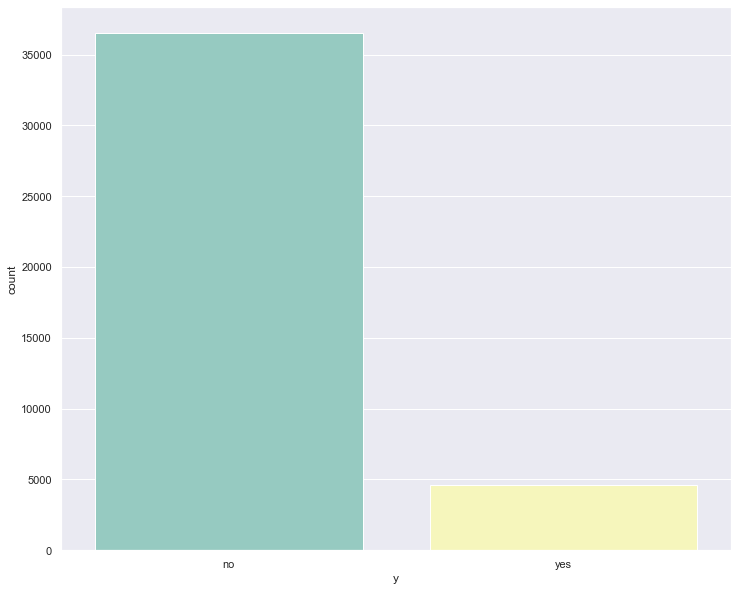

In [6]:
sns.countplot(x = 'y', data = data, palette = 'Set3')



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

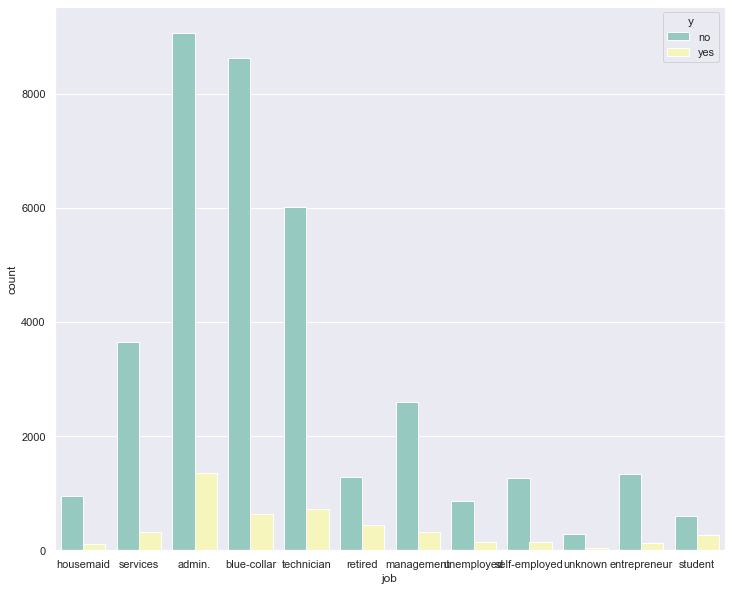

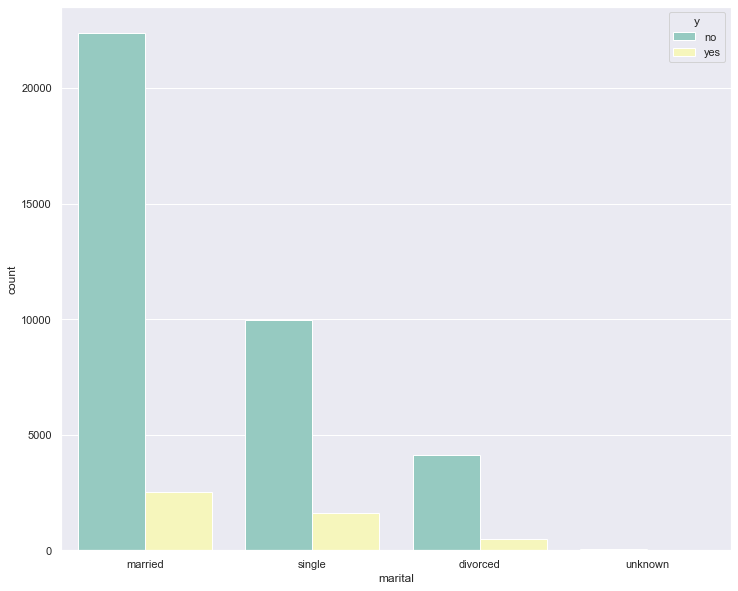

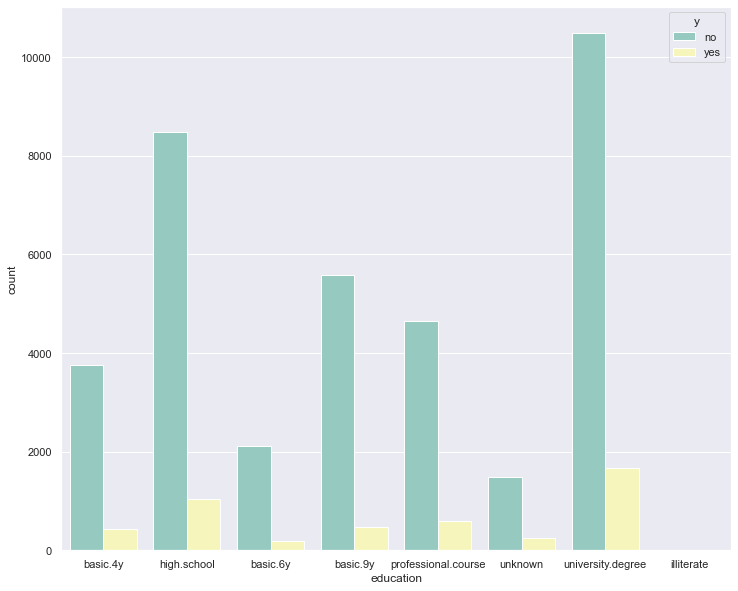

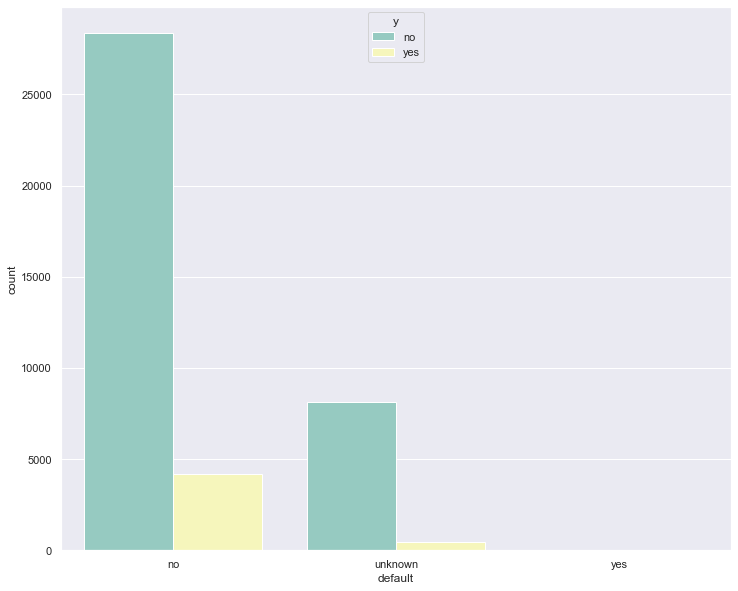

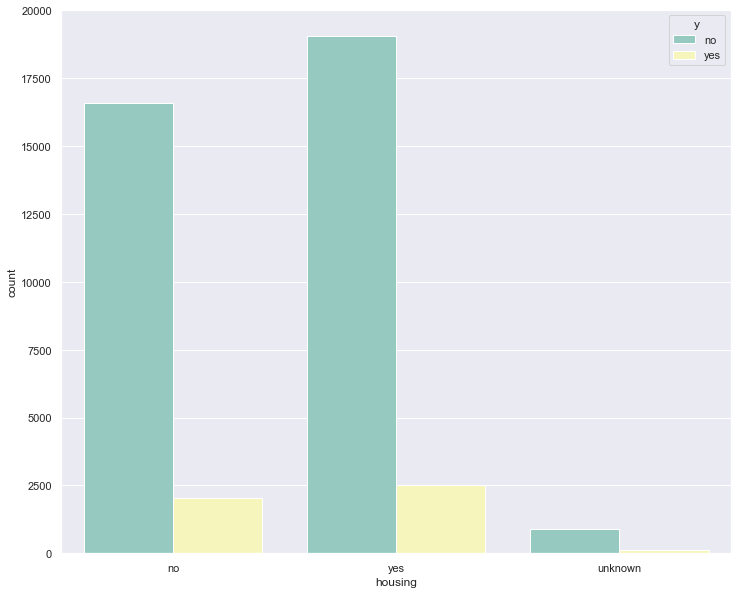

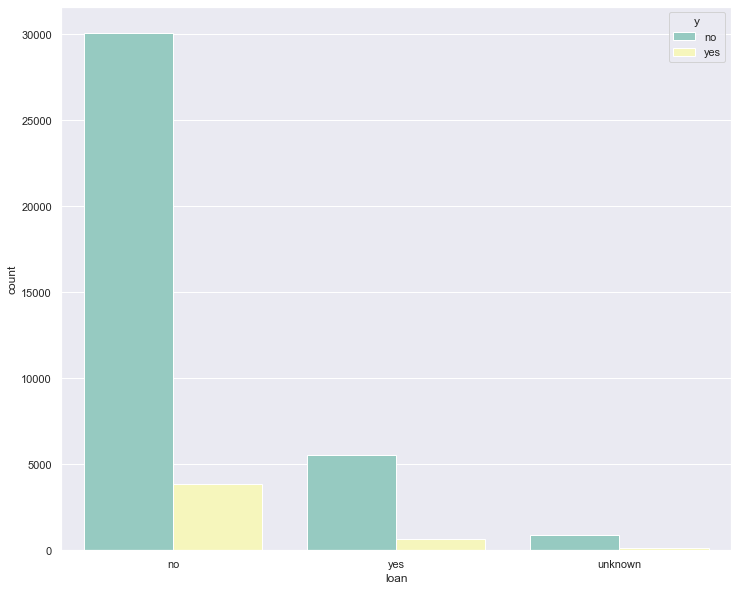

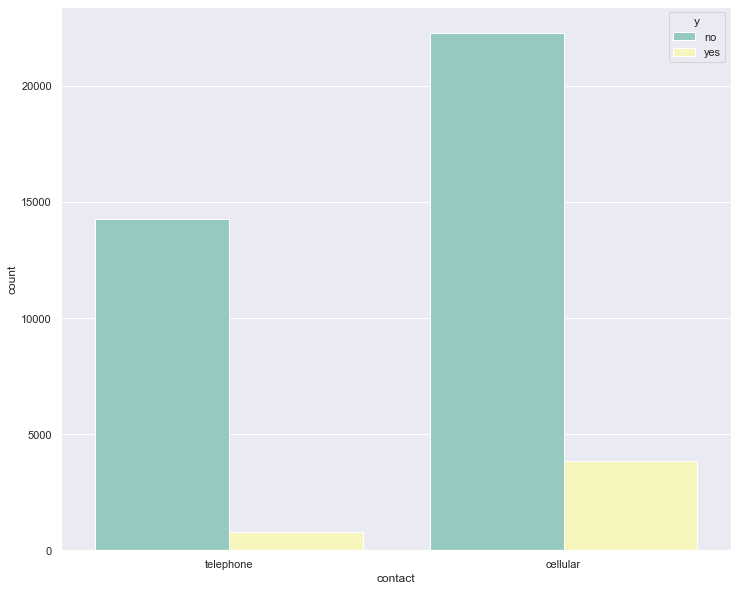

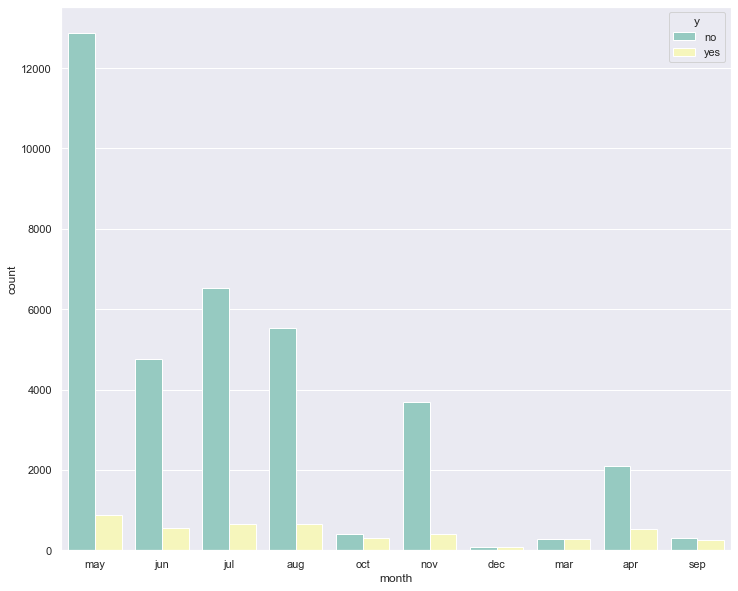

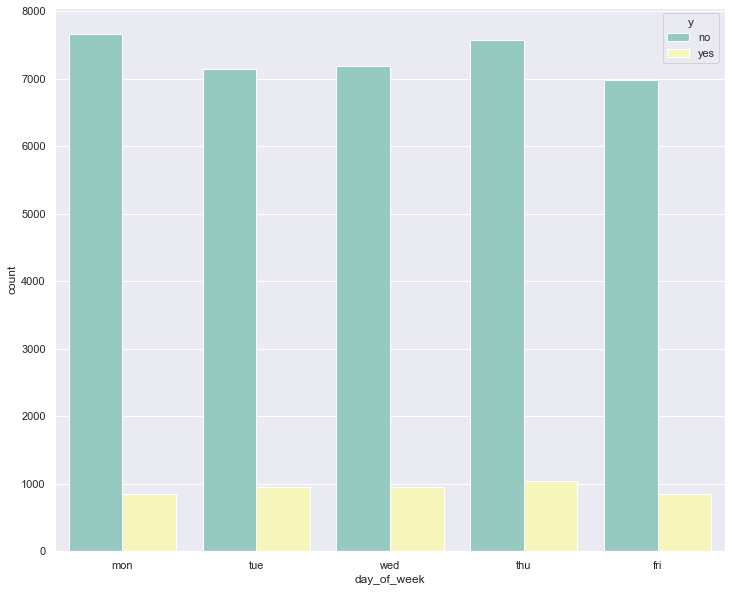

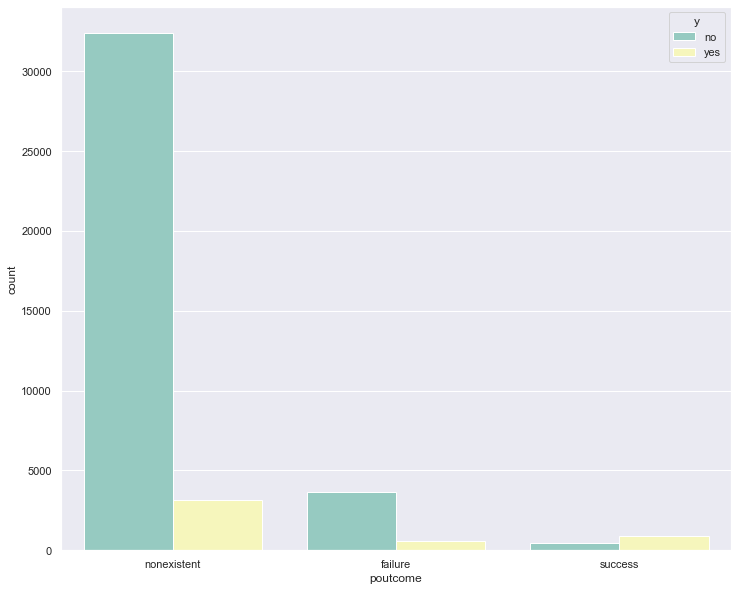

In [8]:
features = ['job', 'marital', 'education',
       'default', 'housing',
       'loan', 'contact', 'month',
       'day_of_week','poutcome']

for f in features:
    sns.countplot(x = f, data = data, palette = 'Set3', hue = 'y')
    plt.show()

In [44]:
#transforming categorical variables to numerical

# le=LabelEncoder()

# for i in range (len(data.columns)):
#     if data.dtypes[data.columns[i]]==object:
#         data[data.columns [i]]= pd.Series(le.fit_transform(data [data.columns [i]]))
        

#data.head()
    

# X = data.iloc[:,:-1]
# y = data.iloc[:,-1]


In [20]:
#scale the numberical variables
# std = StandardScaler()
# num_col_list=[]

# for i in range (len(data.columns)):
#     if data.dtypes[data.columns[i]]!=object:
#         num_col_list.append(data.columns [i])
        
# transformed_cols=std.fit_transform(data [num_col_list])

# transformed_cols = pd.DataFrame(transformed_cols, columns = num_col_list)

# for i in range (len(data.columns)):
#     for j in range (len(transformed_cols.columns)):
#         if data.columns [i]==transformed_cols.columns [j]:
#             data[data.columns[i]] = transformed_cols [transformed_cols.columns [j]]

In [158]:
#transforming categorical variables to numerical

# le=LabelEncoder()

# for i in range (len(data.columns)):
#     if data.dtypes[data.columns[i]]==object:
#         data[data.columns [i]]= pd.Series(le.fit_transform(data [data.columns [i]]))
        

#data.head()

In [9]:
# Making categorical variables into numeric representation

#transforming categorical variables to numerical
        

data.head()

data = pd.get_dummies(data, columns = features)

data['y'][data['y'] == 'yes'] = 1
data['y'][data['y'] == 'no'] = 0


<ipython-input-9-4cf1985fa1a7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'][data['y'] == 'yes'] = 1
<ipython-input-9-4cf1985fa1a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'][data['y'] == 'no'] = 0


In [10]:
pd.set_option('display.max_columns', None)

## Data preprocessing

In [11]:
# Separating the independent variables from dependent variables
#X = data[['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome']]
X = data.drop(['y'],axis=1)
y = data['y'].astype('int')
X.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [12]:
#function that normalizes the columns of dataframe
def normalize(Xd):
    # For each feature (indexed by j as usual)
    for j in Xd.columns:
        # Subtract its column mean and update the value.
        Xd[j] -= Xd[j].mean()
        # Divide by its standard deviation and update the value.
        Xd[j] /= Xd[j].std()
    return Xd

In [13]:
#normalizing numerical variables
num_features = ['age', 'duration', 'campaign',
       'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m',
       'nr.employed']

num_features_norm=normalize(X[num_features])
for i in range (len(X.columns)):
    for j in range (len(num_features_norm.columns)):
        if X.columns [i]==num_features_norm.columns [j]:
            X[X.columns[i]] = num_features_norm [num_features_norm.columns [j]]


<ipython-input-12-ec2d3e3ecaa3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xd[j] -= Xd[j].mean()
<ipython-input-12-ec2d3e3ecaa3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xd[j] /= Xd[j].std()


In [15]:
X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
14869,-1.153802,-0.313504,-0.565915,0.195412,-0.34949,0.839050,0.591417,-0.474785,0.770106,0.845160,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
38351,2.108762,1.769193,-0.204906,0.195412,-0.34949,-2.216407,-1.977514,2.939071,-1.661792,-2.069657,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4676,-0.769971,-0.429209,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,0.713028,0.331676,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4151,-0.865929,0.211027,-0.204906,0.195412,-0.34949,0.648084,0.722714,0.886436,0.713028,0.331676,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
21426,0.189607,-0.328931,-0.565915,0.195412,-0.34949,0.839050,-0.227462,0.951256,0.773566,0.845160,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [16]:
X_test.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
5438,-0.769971,0.002758,-0.204906,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
39471,4.027918,1.044106,-0.565915,-5.117280,3.691722,-1.197921,0.299453,1.275356,-1.717141,-2.191454,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
28353,-0.674013,-0.336645,-0.204906,0.195412,-0.349490,-1.197921,-0.864944,-1.425479,-1.254746,-0.940270,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
16583,1.820889,0.596712,-0.204906,0.195412,-0.349490,0.839050,0.591417,-0.474785,0.773566,0.845160,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
37618,-1.345718,-0.552628,-0.565915,0.195412,-0.349490,-1.898130,-2.374861,1.966770,-1.591453,-1.257218,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# Creating and testing Models

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix 
def doLogisticRegression(Xd, y):
  # Instanciate an object from Logistic Regression class.
  lr = LogisticRegression()

  # Perform training and prediction.
  lr.fit(Xd, y)
  y_pred = lr.predict(Xd)
      
  # Return training accuracy and confusion matrix.
  return accuracy_score(y, y_pred), confusion_matrix(y, y_pred), lr

In [18]:
def doLogisticRegressionWithParam(Xd, y,c):
  # Instanciate an object from Logistic Regression class.
  lr = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)

  # Perform training and prediction.
  lr.fit(Xd, y)
  y_pred = lr.predict(Xd)
      
  # Return training accuracy and confusion matrix.
  return accuracy_score(y, y_pred), confusion_matrix(y, y_pred), lr

In [15]:
from sklearn.metrics import f1_score,roc_auc_score
def performMetrices(y_actual ,  y_predicted):
    cm=confusion_matrix(y_actual, y_predicted)
    
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    print(cm)
    
    accu=accuracy_score(y_actual, y_predicted)
    print("Accuracy: ",accuracy_score(y_actual, y_predicted))
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP / (TP + FN)
    print("The True Positive Rate is:", TPR.sum()/2)
    
    # Precision or positive predictive value
    PPV = TP / (TP + FP)
    print("The Precision is:", PPV.sum()/2)
    
    # False positive rate or False alarm rate
    FPR = FP / (FP + TN)
    print("The False positive rate is:", FPR.sum()/2)
    
    # False negative rate or Miss Rate
    FNR = FN / (FN + TP)
    print("The False Negative Rate is: ", FNR.sum()/2)
    
    print("F1 Scoref1_score :",f1_score(y_actual, y_predicted))
    
    #ROC AUC Score 
    try:
        ROC=roc_auc_score(y_actual, y_predicted)
        print("ROC AUC Score :",roc_auc_score(y_actual, y_predicted))
    except:
        print("Error in calculating ROC AUC")
        
    return accu,ROC
    

#function to plot confusion matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
#Training the model and calculating accuracy and confusion matrix
C_List = np.geomspace(1e-5, 1e5, num=20)
#C_List =[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.1,0.12,0.14,0.16]
log_train_c_accu_scores={}
log_train_c_roc_scores={}
log_test_c_accu_scores={}
log_test_c_roc_scores={}
for c in C_List:
    TrainAcc, TrainConf, LR = doLogisticRegressionWithParam(X_train, y_train,c)
    y_train_pred = LR.predict(X_train) 
    print("C=",c)
    print("Train:")
    tra_acc,tra_roc=performMetrices(y_train,y_train_pred)
    log_train_c_accu_scores[c]=tra_acc
    log_train_c_roc_scores[c]=tra_roc
    print("Test:")
    y_test_pred = LR.predict(X_test)
    TestAcc, TestConf = accuracy_score(y_test, y_test_pred), confusion_matrix(y_test, y_test_pred)
    test_acc,test_roc=performMetrices(y_test, y_test_pred)
    log_test_c_accu_scores[c]=test_acc
    log_test_c_roc_scores[c]=test_roc
    print("==========================================================")

C= 1e-05
Train:
[[25561     0]
 [ 3270     0]]
Accuracy:  0.8865804169123513
The True Positive Rate is: 0.5
The Precision is: nan
The False positive rate is: 0.5
The False Negative Rate is:  0.5
F1 Scoref1_score : 0.0
ROC AUC Score : 0.5
Test:
[[10987     0]
 [ 1370     0]]
Accuracy:  0.8891316662620377
The True Positive Rate is: 0.5
The Precision is: nan
The False positive rate is: 0.5
The False Negative Rate is:  0.5
F1 Scoref1_score : 0.0
ROC AUC Score : 0.5
C= 3.359818286283781e-05
Train:
[[25561     0]
 [ 3270     0]]
Accuracy:  0.8865804169123513
The True Positive Rate is: 0.5
The Precision is: nan
The False positive rate is: 0.5
The False Negative Rate is:  0.5
F1 Scoref1_score : 0.0
ROC AUC Score : 0.5
Test:
[[10986     1]
 [ 1370     0]]
Accuracy:  0.8890507404709881
The True Positive Rate is: 0.499954491671976
The Precision is: 0.444561346714147
The False positive rate is: 0.5000455083280241
The False Negative Rate is:  0.5000455083280241
F1 Scoref1_score : 0.0
ROC AUC Score 

<ipython-input-21-e6aef25312d4>:20: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP / (TP + FP)
<ipython-input-21-e6aef25312d4>:20: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP / (TP + FP)
<ipython-input-21-e6aef25312d4>:20: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP / (TP + FP)


C= 0.000379269019073225
Train:
[[25313   248]
 [ 2548   722]]
Accuracy:  0.9030210537268912
The True Positive Rate is: 0.6055464131076024
The Precision is: 0.8264379465513075
The False positive rate is: 0.3944535868923976
The False Negative Rate is:  0.3944535868923976
F1 Scoref1_score : 0.34056603773584904
ROC AUC Score : 0.6055464131076024
Test:
[[10863   124]
 [ 1052   318]]
Accuracy:  0.9048312697256615
The True Positive Rate is: 0.6104153614856045
The Precision is: 0.8155824723769233
The False positive rate is: 0.38958463851439556
The False Negative Rate is:  0.38958463851439556
F1 Scoref1_score : 0.3509933774834437
ROC AUC Score : 0.6104153614856044
C= 0.0012742749857031334
Train:
[[25101   460]
 [ 2200  1070]]
Accuracy:  0.9077381984669279
The True Positive Rate is: 0.6546104796740351
The Precision is: 0.809381638202819
The False positive rate is: 0.34538952032596487
The False Negative Rate is:  0.34538952032596487
F1 Scoref1_score : 0.4458333333333333
ROC AUC Score : 0.65461047

K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C= 0.1623776739188721
Train:
[[24898   663]
 [ 1879  1391]]
Accuracy:  0.9118310152266658
The True Positive Rate is: 0.6997221553238299
The Precision is: 0.8035215135982468
The False positive rate is: 0.3002778446761701
The False Negative Rate is:  0.3002778446761701
F1 Scoref1_score : 0.5225394440270473
ROC AUC Score : 0.69972215532383
Test:
[[10678   309]
 [  790   580]]
Accuracy:  0.9110625556364813
The True Positive Rate is: 0.6976167587573635
The Precision is: 0.7917655545062448
The False positive rate is: 0.30238324124263644
The False Negative Rate is:  0.30238324124263644
F1 Scoref1_score : 0.5135015493581231
ROC AUC Score : 0.6976167587573635
C= 0.5455594781168515
Train:
[[24888   673]
 [ 1875  1395]]
Accuracy:  0.9116229058998994
The True Positive Rate is: 0.7001381656185652
The Precision is: 0.8022526932626101
The False positive rate is: 0.2998618343814347
The False Negative Rate is:  0.2998618343814347
F1 Scoref1_score : 0.5226676657924316
ROC AUC Score : 0.7001381656185653


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 1.8329807108324339
Train:
[[24886   675]
 [ 1866  1404]]
Accuracy:  0.9118657001144601
The True Positive Rate is: 0.7014751903074818
The Precision is: 0.8027864405331511
The False positive rate is: 0.2985248096925182
The False Negative Rate is:  0.2985248096925182
F1 Scoref1_score : 0.5249579360628154
ROC AUC Score : 0.7014751903074817
Test:
[[10668   319]
 [  783   587]]
Accuracy:  0.9108197782633325
The True Positive Rate is: 0.6997164200026706
The Precision is: 0.7897622810928916
The False positive rate is: 0.3002835799973293
The False Negative Rate is:  0.3002835799973293
F1 Scoref1_score : 0.515817223198594
ROC AUC Score : 0.6997164200026708


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 6.1584821106602545
Train:
[[24885   676]
 [ 1866  1404]]
Accuracy:  0.9118310152266658
The True Positive Rate is: 0.7014556292574445
The Precision is: 0.8026227991476954
The False positive rate is: 0.2985443707425554
The False Negative Rate is:  0.2985443707425554
F1 Scoref1_score : 0.5248598130841121
ROC AUC Score : 0.7014556292574445
Test:
[[10666   321]
 [  784   586]]
Accuracy:  0.9105770008901837
The True Positive Rate is: 0.699260439842973
The Precision is: 0.7888071910372021
The False positive rate is: 0.30073956015702696
The False Negative Rate is:  0.30073956015702696
F1 Scoref1_score : 0.5147123407992973
ROC AUC Score : 0.699260439842973


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 20.6913808111479
Train:
[[24884   677]
 [ 1867  1403]]
Accuracy:  0.911761645451077
The True Positive Rate is: 0.7012831630086307
The Precision is: 0.8023637236422506
The False positive rate is: 0.2987168369913693
The False Negative Rate is:  0.2987168369913693
F1 Scoref1_score : 0.5244859813084112
ROC AUC Score : 0.7012831630086307
Test:
[[10666   321]
 [  782   588]]
Accuracy:  0.9107388524722829
The True Positive Rate is: 0.6999903668502723
The Precision is: 0.7892779057779992
The False positive rate is: 0.30000963314972773
The False Negative Rate is:  0.30000963314972773
F1 Scoref1_score : 0.5160157964019306
ROC AUC Score : 0.6999903668502723


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 69.51927961775606
Train:
[[24884   677]
 [ 1868  1402]]
Accuracy:  0.9117269605632826
The True Positive Rate is: 0.7011302578098539
The Precision is: 0.8022680596693754
The False positive rate is: 0.29886974219014606
The False Negative Rate is:  0.29886974219014606
F1 Scoref1_score : 0.5242101327350907
ROC AUC Score : 0.7011302578098539
Test:
[[10666   321]
 [  784   586]]
Accuracy:  0.9105770008901837
The True Positive Rate is: 0.699260439842973
The Precision is: 0.7888071910372021
The False positive rate is: 0.30073956015702696
The False Negative Rate is:  0.30073956015702696
F1 Scoref1_score : 0.5147123407992973
ROC AUC Score : 0.699260439842973


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 233.57214690901213
Train:
[[24883   678]
 [ 1868  1402]]
Accuracy:  0.9116922756754882
The True Positive Rate is: 0.7011106967598167
The Precision is: 0.8021046481368058
The False positive rate is: 0.29888930324018326
The False Negative Rate is:  0.29888930324018326
F1 Scoref1_score : 0.5241121495327103
ROC AUC Score : 0.7011106967598167
Test:
[[10666   321]
 [  783   587]]
Accuracy:  0.9106579266812334
The True Positive Rate is: 0.6996254033466227
The Precision is: 0.7890427592506588
The False positive rate is: 0.30037459665337735
The False Negative Rate is:  0.30037459665337735
F1 Scoref1_score : 0.5153643546971027
ROC AUC Score : 0.6996254033466226


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 784.7599703514607
Train:
[[24884   677]
 [ 1868  1402]]
Accuracy:  0.9117269605632826
The True Positive Rate is: 0.7011302578098539
The Precision is: 0.8022680596693754
The False positive rate is: 0.29886974219014606
The False Negative Rate is:  0.29886974219014606
F1 Scoref1_score : 0.5242101327350907
ROC AUC Score : 0.7011302578098539
Test:
[[10666   321]
 [  783   587]]
Accuracy:  0.9106579266812334
The True Positive Rate is: 0.6996254033466227
The Precision is: 0.7890427592506588
The False positive rate is: 0.30037459665337735
The False Negative Rate is:  0.30037459665337735
F1 Scoref1_score : 0.5153643546971027
ROC AUC Score : 0.6996254033466226


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 2636.6508987303555
Train:
[[24884   677]
 [ 1868  1402]]
Accuracy:  0.9117269605632826
The True Positive Rate is: 0.7011302578098539
The Precision is: 0.8022680596693754
The False positive rate is: 0.29886974219014606
The False Negative Rate is:  0.29886974219014606
F1 Scoref1_score : 0.5242101327350907
ROC AUC Score : 0.7011302578098539
Test:
[[10666   321]
 [  783   587]]
Accuracy:  0.9106579266812334
The True Positive Rate is: 0.6996254033466227
The Precision is: 0.7890427592506588
The False positive rate is: 0.30037459665337735
The False Negative Rate is:  0.30037459665337735
F1 Scoref1_score : 0.5153643546971027
ROC AUC Score : 0.6996254033466226


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 8858.667904100832
Train:
[[24885   676]
 [ 1868  1402]]
Accuracy:  0.911761645451077
The True Positive Rate is: 0.701149818859891
The Precision is: 0.8024316271259477
The False positive rate is: 0.2988501811401089
The False Negative Rate is:  0.2988501811401089
F1 Scoref1_score : 0.5243081525804039
ROC AUC Score : 0.701149818859891
Test:
[[10666   321]
 [  783   587]]
Accuracy:  0.9106579266812334
The True Positive Rate is: 0.6996254033466227
The Precision is: 0.7890427592506588
The False positive rate is: 0.30037459665337735
The False Negative Rate is:  0.30037459665337735
F1 Scoref1_score : 0.5153643546971027
ROC AUC Score : 0.6996254033466226


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 29763.51441631313
Train:
[[24886   675]
 [ 1868  1402]]
Accuracy:  0.9117963303388713
The True Positive Rate is: 0.7011693799099282
The Precision is: 0.8025953507318899
The False positive rate is: 0.2988306200900717
The False Negative Rate is:  0.2988306200900717
F1 Scoref1_score : 0.5244062090892089
ROC AUC Score : 0.7011693799099282
Test:
[[10666   321]
 [  783   587]]
Accuracy:  0.9106579266812334
The True Positive Rate is: 0.6996254033466227
The Precision is: 0.7890427592506588
The False positive rate is: 0.30037459665337735
The False Negative Rate is:  0.30037459665337735
F1 Scoref1_score : 0.5153643546971027
ROC AUC Score : 0.6996254033466226
C= 100000.0
Train:
[[24884   677]
 [ 1868  1402]]
Accuracy:  0.9117269605632826
The True Positive Rate is: 0.7011302578098539
The Precision is: 0.8022680596693754
The False positive rate is: 0.29886974219014606
The False Negative Rate is:  0.29886974219014606
F1 Scoref1_score : 0.5242101327350907
ROC AUC Score : 0.7011302578098539
Test:
[

K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
def dictToArr(log_train_c_accu_scores,log_train_c_roc_scores,log_test_c_accu_scores,log_test_c_roc_scores):
    accTrain=[]
    cs=[]
    for key, value in log_train_c_accu_scores.items():
        accTrain.append(value)
        cs.append(key)

    rocTrain=[]
    for key, value in log_train_c_roc_scores.items():
        rocTrain.append(value)

    accTest=[]
    for key, value in log_test_c_accu_scores.items():
        accTest.append(value)

    rocTest=[]
    for key, value in log_test_c_roc_scores.items():
        rocTest.append(value)
        
    return cs,accTrain,rocTrain,accTest,rocTest

In [25]:
accTrain=[]
cs=[]
for key, value in log_train_c_accu_scores.items():
    accTrain.append(value)
    cs.append(key)
    
rocTrain=[]
for key, value in log_train_c_roc_scores.items():
    rocTrain.append(value)

accTest=[]
for key, value in log_test_c_accu_scores.items():
    accTest.append(value)

rocTest=[]
for key, value in log_test_c_roc_scores.items():
    rocTest.append(value)

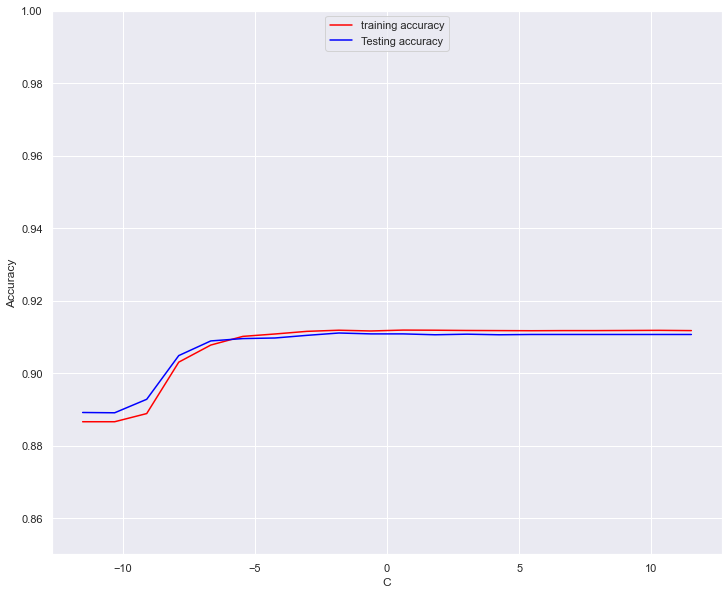

In [32]:
import matplotlib.pyplot as plt

plt.plot(np.log(np.array(cs)), accTrain, color='red', label='training accuracy')
plt.plot(np.log(np.array(cs)), accTest, color='blue', label='Testing accuracy')
plt.legend(loc='upper center')
plt.ylim(0.85, 1)
plt.xlabel('C')
plt.ylabel('Accuracy');

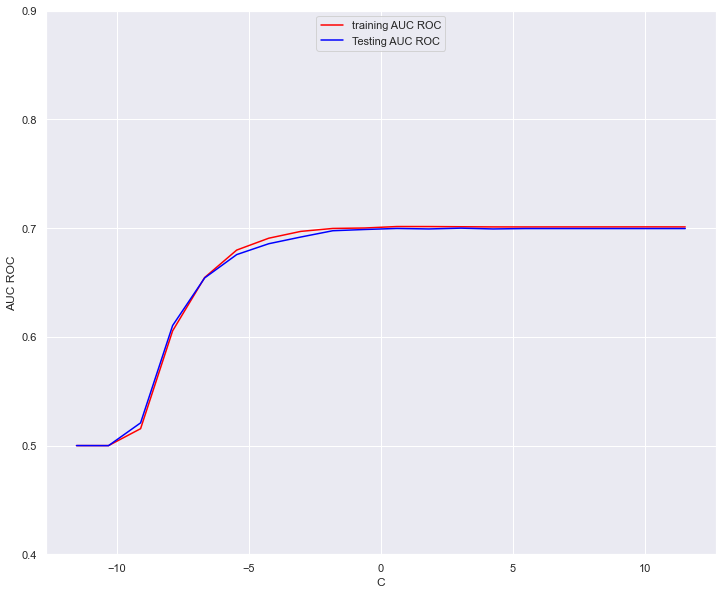

In [35]:
plt.plot(np.log(np.array(cs)), rocTrain, color='red', label='training AUC ROC')
plt.plot(np.log(np.array(cs)), rocTest, color='blue', label='Testing AUC ROC')
plt.legend(loc='upper center')
plt.ylim(0.4, 0.9)
plt.xlabel('C')
plt.ylabel('AUC ROC');

In [23]:
TrainAcc, TrainConf, LR = doLogisticRegression(X_train, y_train)
y_train_pred = LR.predict(X_train)
performMetrices(y_train,y_train_pred)

[[24910   686]
 [ 1871  1364]]
Accuracy:  0.9113107419097499
The True Positive Rate is: 0.6974186340456501
The Precision is: 0.7977514455552308
The False positive rate is: 0.30258136595435
The False Negative Rate is:  0.30258136595435
F1 Scoref1_score : 0.5161778618732261
ROC AUC Score : 0.6974186340456501


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#Testing the trained model on test data
y_test_pred = LR.predict(X_test)

TestAcc, TestConf = accuracy_score(y_test, y_test_pred), confusion_matrix(y_test, y_test_pred)
print(TestAcc)

performMetrices(y_test, y_test_pred)


0.9125192198753743
[[10673   279]
 [  802   603]]
Accuracy:  0.9125192198753743
The True Positive Rate is: 0.701853347769237
The Precision is: 0.8068912009248144
The False positive rate is: 0.29814665223076303
The False Negative Rate is:  0.29814665223076303
F1 Scoref1_score : 0.5273283777874945
ROC AUC Score : 0.701853347769237


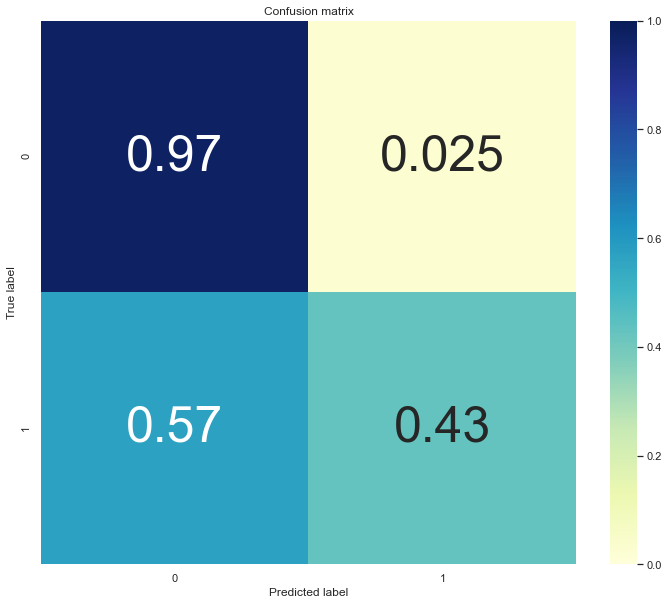

In [25]:
#plotting confusion matrix for testing data
TestConf = TestConf / TestConf.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(TestConf, classes = LR.classes_, title='Confusion matrix')


## Balancing the dataset

In [16]:
#balancing the dataset
from collections import Counter

# define oversampling strategy
smote = SMOTE()

print("before resampling:",Counter(y_train))

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

before resampling: Counter({0: 25618, 1: 3213})
After oversampling:  Counter({0: 25618, 1: 25618})


In [17]:
#checking the balanced database
X_train_SMOTE.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.865929,-0.649049,-0.565915,0.195412,-0.34949,-0.115780,-0.648995,-0.323538,0.328467,0.39811,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,0.765353,-0.467778,-0.565915,0.195412,-0.34949,-0.115780,-0.648995,-0.323538,0.306558,0.39811,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,1.245142,-0.425352,-0.565915,0.195412,-0.34949,0.839050,-0.227462,0.951256,0.777602,0.84516,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.189607,-0.271078,-0.565915,0.195412,-0.34949,0.839050,-0.227462,0.951256,0.776449,0.84516,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,-1.537633,0.149318,-0.565915,0.195412,-0.34949,-1.197921,-1.179366,-1.231019,-1.370633,-0.94027,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


## Checking the performance after oversampling

In [38]:
#Training the model with balanaced database
TrainAcc, TrainConf, LR = doLogisticRegression(X_train_SMOTE, y_train_SMOTE)
print(TrainAcc)

y_train_smote_pred=LR.predict(X_train_SMOTE)
performMetrices(y_train_SMOTE,y_train_smote_pred)

0.9425491960408434
[[24637   924]
 [ 2013 23548]]
Accuracy:  0.9425491960408434
The True Positive Rate is: 0.9425491960408434
The Precision is: 0.943353926867908
The False positive rate is: 0.05745080395915653
The False Negative Rate is:  0.05745080395915653
F1 Scoref1_score : 0.9412987428297325
ROC AUC Score : 0.9425491960408435


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9425491960408434, 0.9425491960408435)

In [39]:
#Testing the model created by training on balanced database
y_test_pred = LR.predict(X_test)
TestAcc, TestConf = accuracy_score(y_test, y_test_pred), confusion_matrix(y_test, y_test_pred)
print(TestAcc)

performMetrices(y_test,y_test_pred)

0.9105770008901837
[[10554   433]
 [  672   698]]
Accuracy:  0.9105770008901837
The True Positive Rate is: 0.735039419513041
The Precision is: 0.7786459625509368
The False positive rate is: 0.26496058048695903
The False Negative Rate is:  0.26496058048695903
F1 Scoref1_score : 0.5581767293082767
ROC AUC Score : 0.735039419513041


(0.9105770008901837, 0.735039419513041)

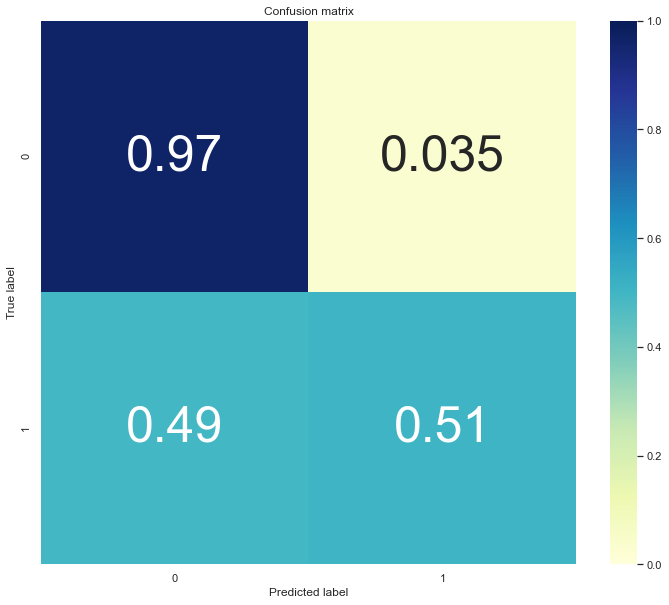

In [30]:
#Plotting confusion matrix
TestConf = TestConf / TestConf.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(TestConf, classes = LR.classes_, title='Confusion matrix')

In [46]:
log_train_c_accu_scores1={}
log_train_c_roc_scores1={}
log_test_c_accu_scores1={}
log_test_c_roc_scores1={}
for c in C_List:
    TrainAcc, TrainConf, LR = doLogisticRegressionWithParam(X_train_SMOTE, y_train_SMOTE,c)
    y_train_pred = LR.predict(X_train_SMOTE) 
    print("C=",c)
    print("Train:")
    print(TrainAcc)
    accuTra,rocTra=performMetrices(y_train_SMOTE,y_train_pred)
    log_train_c_accu_scores1[c]=accuTra
    log_train_c_roc_scores1[c]=rocTra
    print("Test:")
    y_test_pred = LR.predict(X_test)
    TestAcc, TestConf = accuracy_score(y_test, y_test_pred), confusion_matrix(y_test, y_test_pred)
    print(TestAcc)
    accTest,rocTest=performMetrices(y_test, y_test_pred)
    log_test_c_accu_scores1[c]=accTest
    log_test_c_roc_scores1[c]=rocTest
    print("==========================================================")

C= 1e-05
Train:
0.7833809318884237
[[20038  5523]
 [ 5551 20010]]
Accuracy:  0.7833809318884237
The True Positive Rate is: 0.7833809318884237
The Precision is: 0.7833812719296137
The False positive rate is: 0.21661906811157622
The False Negative Rate is:  0.21661906811157622
F1 Scoref1_score : 0.7832622225701648
ROC AUC Score : 0.7833809318884237
Test:
0.7810957352108117
[[8585 2402]
 [ 303 1067]]
Accuracy:  0.7810957352108117
The True Positive Rate is: 0.7801050544804444
The Precision is: 0.636745263240651
The False positive rate is: 0.21989494551955563
The False Negative Rate is:  0.21989494551955563
F1 Scoref1_score : 0.44100020665426737
ROC AUC Score : 0.7801050544804444
C= 3.359818286283781e-05
Train:
0.820762098509448
[[21048  4513]
 [ 4650 20911]]
Accuracy:  0.820762098509448
The True Positive Rate is: 0.8207620985094479
The Precision is: 0.8207713132046772
The False positive rate is: 0.17923790149055202
The False Negative Rate is:  0.17923790149055202
F1 Scoref1_score : 0.82028

K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 0.04832930238571752
Train:
0.9397324048354916
[[24200  1361]
 [ 1720 23841]]
Accuracy:  0.9397324048354916
The True Positive Rate is: 0.9397324048354916
The Precision is: 0.9398191624023569
The False positive rate is: 0.06026759516450843
The False Negative Rate is:  0.06026759516450843
F1 Scoref1_score : 0.9393061875775663
ROC AUC Score : 0.9397324048354916
Test:
0.9096058913975884
[[10363   624]
 [  493   877]]
Accuracy:  0.9096058913975884
The True Positive Rate is: 0.7916757960137362
The Precision is: 0.7694322367745994
The False positive rate is: 0.2083242039862638
The False Negative Rate is:  0.2083242039862638
F1 Scoref1_score : 0.6109369557645419
ROC AUC Score : 0.7916757960137363


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 0.1623776739188721
Train:
0.9425687570908806
[[24492  1069]
 [ 1867 23694]]
Accuracy:  0.9425687570908806
The True Positive Rate is: 0.9425687570908806
The Precision is: 0.9430005289631269
The False positive rate is: 0.057431242909119364
The False Negative Rate is:  0.057431242909119364
F1 Scoref1_score : 0.9416580557984261
ROC AUC Score : 0.9425687570908806
Test:
0.9115481103827789
[[10487   500]
 [  593   777]]
Accuracy:  0.9115481103827789
The True Positive Rate is: 0.7608224783237523
The Precision is: 0.7774687331262068
The False positive rate is: 0.23917752167624776
The False Negative Rate is:  0.23917752167624776
F1 Scoref1_score : 0.5870797128825085
ROC AUC Score : 0.7608224783237523


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 0.5455594781168515
Train:
0.9426861233911036
[[24606   955]
 [ 1975 23586]]
Accuracy:  0.9426861233911036
The True Positive Rate is: 0.9426861233911037
The Precision is: 0.9433921688779101
The False positive rate is: 0.057313876608896364
The False Negative Rate is:  0.057313876608896364
F1 Scoref1_score : 0.9415193006267215
ROC AUC Score : 0.9426861233911037
Test:
0.9101723719349356
[[10533   454]
 [  656   714]]
Accuracy:  0.9101723719349356
The True Positive Rate is: 0.7399231606829305
The Precision is: 0.776336179613784
The False positive rate is: 0.2600768393170695
The False Negative Rate is:  0.2600768393170695
F1 Scoref1_score : 0.5626477541371159
ROC AUC Score : 0.7399231606829305


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 1.8329807108324339
Train:
0.9429012949415124
[[24675   886]
 [ 2033 23528]]
Accuracy:  0.9429012949415124
The True Positive Rate is: 0.9429012949415125
The Precision is: 0.9437949161718973
The False positive rate is: 0.057098705058487534
The False Negative Rate is:  0.057098705058487534
F1 Scoref1_score : 0.9415907953976989
ROC AUC Score : 0.9429012949415125
Test:
0.911143481427531
[[10570   417]
 [  681   689]]
Accuracy:  0.911143481427531
The True Positive Rate is: 0.7324828812285786
The Precision is: 0.7812188444410728
The False positive rate is: 0.2675171187714213
The False Negative Rate is:  0.2675171187714213
F1 Scoref1_score : 0.5565428109854604
ROC AUC Score : 0.7324828812285786


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 6.1584821106602545
Train:
0.942138413990063
[[24688   873]
 [ 2085 23476]]
Accuracy:  0.942138413990063
The True Positive Rate is: 0.942138413990063
The Precision is: 0.9431347029572796
The False positive rate is: 0.057861586009937016
The False Negative Rate is:  0.057861586009937016
F1 Scoref1_score : 0.9407333199759568
ROC AUC Score : 0.9421384139900629
Test:
0.9114671845917294
[[10581   406]
 [  688   682]]
Accuracy:  0.9114671845917294
The True Positive Rate is: 0.7304287283112956
The Precision is: 0.7828928952670784
The False positive rate is: 0.26957127168870443
The False Negative Rate is:  0.26957127168870443
F1 Scoref1_score : 0.5549227013832384
ROC AUC Score : 0.7304287283112956


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 20.6913808111479
Train:
0.9419428034896913
[[24716   845]
 [ 2123 23438]]
Accuracy:  0.9419428034896913
The True Positive Rate is: 0.9419428034896913
The Precision is: 0.9430503426827943
The False positive rate is: 0.058057196510308676
The False Negative Rate is:  0.058057196510308676
F1 Scoref1_score : 0.9404542171575315
ROC AUC Score : 0.9419428034896912
Test:
0.9110625556364813
[[10589   398]
 [  701   669]]
Accuracy:  0.9110625556364813
The True Positive Rate is: 0.7260482693880426
The Precision is: 0.7824506098487269
The False positive rate is: 0.2739517306119575
The False Negative Rate is:  0.2739517306119575
F1 Scoref1_score : 0.5490356996306935
ROC AUC Score : 0.7260482693880426


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 69.51927961775606
Train:
0.9424709518406948
[[24679   882]
 [ 2059 23502]]
Accuracy:  0.9424709518406948
The True Positive Rate is: 0.9424709518406948
The Precision is: 0.9434111162826447
The False positive rate is: 0.05752904815930519
The False Negative Rate is:  0.05752904815930519
F1 Scoref1_score : 0.9411152267494244
ROC AUC Score : 0.9424709518406947
Test:
0.9118718135469774
[[10578   409]
 [  680   690]]
Accuracy:  0.9118718135469774
The True Positive Rate is: 0.7332119113564206
The Precision is: 0.7837210009066851
The False positive rate is: 0.26678808864357945
The False Negative Rate is:  0.26678808864357945
F1 Scoref1_score : 0.5589307411907655
ROC AUC Score : 0.7332119113564206


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 233.57214690901213
Train:
0.9425687570908806
[[24732   829]
 [ 2107 23454]]
Accuracy:  0.9425687570908806
The True Positive Rate is: 0.9425687570908806
The Precision is: 0.9436778649669465
The False positive rate is: 0.05743124290911936
The False Negative Rate is:  0.05743124290911936
F1 Scoref1_score : 0.9410962202070461
ROC AUC Score : 0.9425687570908806
Test:
0.9116290361738286
[[10594   393]
 [  699   671]]
Accuracy:  0.9116290361738286
The True Positive Rate is: 0.727005738035462
The Precision is: 0.7843711737725612
The False positive rate is: 0.272994261964538
The False Negative Rate is:  0.272994261964538
F1 Scoref1_score : 0.5513557929334428
ROC AUC Score : 0.727005738035462


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 784.7599703514607
Train:
0.9418841203395798
[[24715   846]
 [ 2125 23436]]
Accuracy:  0.9418841203395798
The True Positive Rate is: 0.9418841203395798
The Precision is: 0.9429932505062535
The False positive rate is: 0.05811587966042017
The False Negative Rate is:  0.05811587966042017
F1 Scoref1_score : 0.9403928334971812
ROC AUC Score : 0.9418841203395799
Test:
0.9117908877559278
[[10606   381]
 [  709   661]]
Accuracy:  0.9117908877559278
The True Positive Rate is: 0.723902202935254
The Precision is: 0.7858484100819068
The False positive rate is: 0.276097797064746
The False Negative Rate is:  0.276097797064746
F1 Scoref1_score : 0.5480928689883914
ROC AUC Score : 0.723902202935254


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 2636.6508987303555
Train:
0.9425491960408434
[[24663   898]
 [ 2039 23522]]
Accuracy:  0.9425491960408434
The True Positive Rate is: 0.9425491960408434
The Precision is: 0.9434327709887593
The False positive rate is: 0.05745080395915653
The False Negative Rate is:  0.05745080395915653
F1 Scoref1_score : 0.9412376703147195
ROC AUC Score : 0.9425491960408434
Test:
0.9112244072185806
[[10574   413]
 [  684   686]]
Accuracy:  0.9112244072185806
The True Positive Rate is: 0.7315700240297258
The Precision is: 0.7817235132440852
The False positive rate is: 0.26842997597027407
The False Negative Rate is:  0.26842997597027407
F1 Scoref1_score : 0.555690562980964
ROC AUC Score : 0.7315700240297258


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 8858.667904100832
Train:
0.9420406087398772
[[24685   876]
 [ 2087 23474]]
Accuracy:  0.9420406087398772
The True Positive Rate is: 0.9420406087398772
The Precision is: 0.9430350306228794
The False positive rate is: 0.05795939126012284
The False Negative Rate is:  0.05795939126012284
F1 Scoref1_score : 0.9406343291058084
ROC AUC Score : 0.9420406087398772
Test:
0.9117099619648782
[[10581   406]
 [  685   685]]
Accuracy:  0.9117099619648782
The True Positive Rate is: 0.7315236188222445
The Precision is: 0.7835309651469514
The False positive rate is: 0.2684763811777555
The False Negative Rate is:  0.2684763811777555
F1 Scoref1_score : 0.5566842746850874
ROC AUC Score : 0.7315236188222445


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C= 29763.51441631313
Train:
0.9424709518406948
[[24697   864]
 [ 2077 23484]]
Accuracy:  0.9424709518406948
The True Positive Rate is: 0.9424709518406948
The Precision is: 0.9434696398008366
The False positive rate is: 0.05752904815930519
The False Negative Rate is:  0.05752904815930519
F1 Scoref1_score : 0.941072752409385
ROC AUC Score : 0.9424709518406948
Test:
0.9113053330096301
[[10581   406]
 [  690   680]]
Accuracy:  0.9113053330096301
The True Positive Rate is: 0.7296988013039963
The Precision is: 0.782465977566247
The False positive rate is: 0.2703011986960037
The False Negative Rate is:  0.2703011986960037
F1 Scoref1_score : 0.5537459283387621
ROC AUC Score : 0.7296988013039963
C= 100000.0
Train:
0.9427448065412152
[[24691   870]
 [ 2057 23504]]
Accuracy:  0.9427448065412152
The True Positive Rate is: 0.9427448065412152
The Precision is: 0.943701640966579
The False positive rate is: 0.05725519345878487
The False Negative Rate is:  0.05725519345878487
F1 Scoref1_score : 0.94138

K:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
cs,accTrain,rocTrain,accTest,rocTest=dictToArr(log_train_c_accu_scores1,log_train_c_roc_scores1,log_test_c_accu_scores1,log_test_c_roc_scores1)

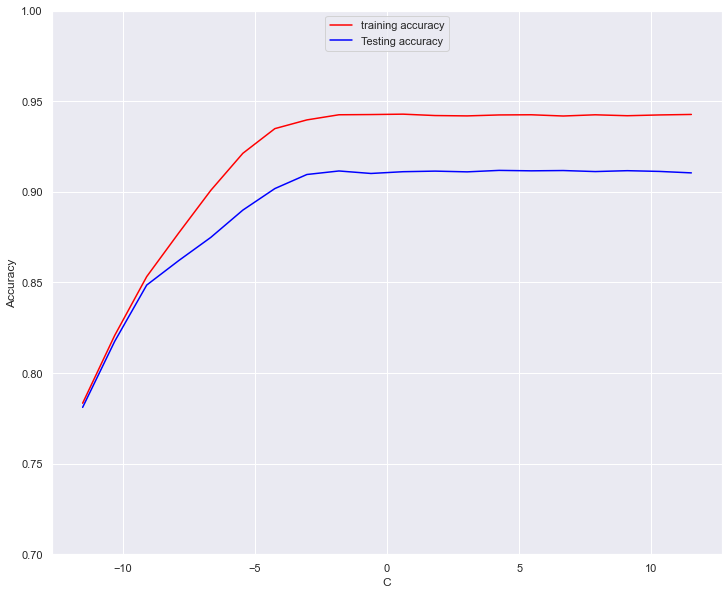

In [49]:
plt.plot(np.log(np.array(cs)), accTrain, color='red', label='training accuracy')
plt.plot(np.log(np.array(cs)), accTest, color='blue', label='Testing accuracy')
plt.legend(loc='upper center')
plt.ylim(0.7, 1)
plt.xlabel('C')
plt.ylabel('Accuracy');

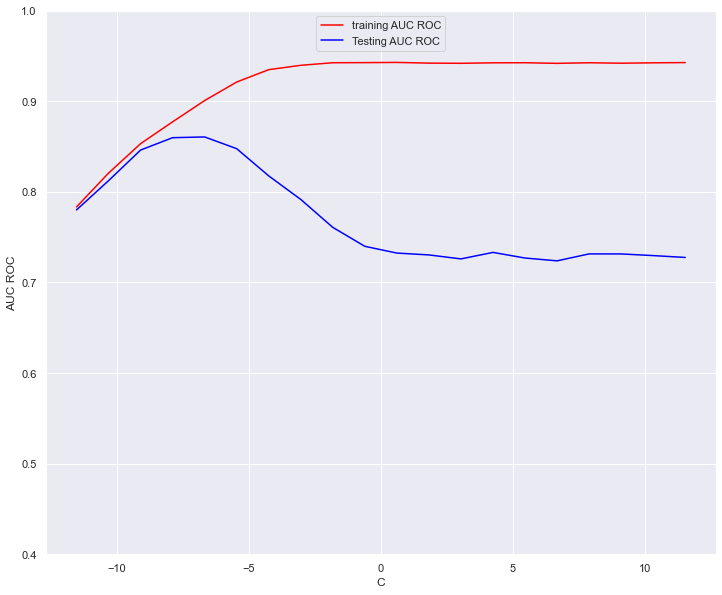

In [51]:
plt.plot(np.log(np.array(cs)), rocTrain, color='red', label='training AUC ROC')
plt.plot(np.log(np.array(cs)), rocTest, color='blue', label='Testing AUC ROC')
plt.legend(loc='upper center')
plt.ylim(0.4, 1)
plt.xlabel('C')
plt.ylabel('AUC ROC');

## SVM implementation

In [52]:
class HardSVM():

    def fit(self, X, y):
        model = svm.SVC(kernel='linear',C=1)
        model.fit(X, y)
        return model 

    def predict(self,model,X):
        return model.predict(X)

In [53]:
from sklearn import svm
from sklearn.svm import LinearSVC

In [54]:
def predictAndAccu(model,X_train,X_test,y_train,y_test,com):
    print("Model-"+com)
    my_model=model.fit(X_train,y_train)
    train_pred=my_model.predict(X_train)
    test_pred=my_model.predict(X_test)
    print("Training performance metrices")
    performMetrices(y_train,train_pred)
    print("Testing performance metrices")
    performMetrices(y_test,test_pred)
    return my_model

In [55]:
model_SVM=predictAndAccu(HardSVM(),X_train_SMOTE,X_test,y_train_SMOTE,y_test,"SVM")

Model-SVM
Training performance metrices
[[24779   782]
 [ 2323 23238]]
Accuracy:  0.9392629396345996
The True Positive Rate is: 0.9392629396345995
The Precision is: 0.9408652826700697
The False positive rate is: 0.060737060365400414
The False Negative Rate is:  0.060737060365400414
F1 Scoref1_score : 0.9373752042112906
ROC AUC Score : 0.9392629396345996
Testing performance metrices
[[10649   338]
 [  764   606]]
Accuracy:  0.9108197782633325
The True Positive Rate is: 0.7057860683395573
The Precision is: 0.7875039725736486
The False positive rate is: 0.29421393166044274
The False Negative Rate is:  0.29421393166044274
F1 Scoref1_score : 0.5237683664649957
ROC AUC Score : 0.7057860683395571


In [67]:
model_SVM=predictAndAccu(HardSVM(),X_train,X_test,y_train,y_test,"SVM")

Model-SVM
Training performance metrices
[[25009   552]
 [ 2166  1104]]
Accuracy:  0.9057264749748535
The True Positive Rate is: 0.6580096398290256
The Precision is: 0.7934805274455689
The False positive rate is: 0.34199036017097434
The False Negative Rate is:  0.34199036017097434
F1 Scoref1_score : 0.44823386114494523
ROC AUC Score : 0.6580096398290257
Testing performance metrices
[[10738   249]
 [  913   457]]
Accuracy:  0.905964230800356
The True Positive Rate is: 0.6554567474899001
The Precision is: 0.7844732047705665
The False positive rate is: 0.3445432525100999
The False Negative Rate is:  0.3445432525100999
F1 Scoref1_score : 0.44026974951830444
ROC AUC Score : 0.6554567474899001


In [56]:
class softSVM():

    def fit(self, X, y,c):
        model = svm.SVC(kernel='linear',C=c)
        model.fit(X, y)
        return model 

    def predict(self,model,X):
        return model.predict(X)

In [57]:
def predictAndAccuSoft(model,X_train,X_test,y_train,y_test,c,com):
    print("Model-"+com)
    print("C=",c)
    my_model=model.fit(X_train,y_train,c)
    train_pred=my_model.predict(X_train)
    test_pred=my_model.predict(X_test)
    print("Training performance metrices")
    accTra,rocTra=performMetrices(train_pred, y_train)
    print("Testing performance metrices")
    accTest,rocTest=performMetrices(test_pred, y_test)
    print("=========================================")
    return accTra,rocTra,accTest,rocTest

In [58]:
#CSVM=[0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512]
CSVM=[0.125,0.25,0.5,1,2,4,8,16]

log_train_c_accu_scores2={}
log_train_c_roc_scores2={}
log_test_c_accu_scores2={}
log_test_c_roc_scores2={}

for c in CSVM:
    accTra,rocTra,accTest,rocTest=predictAndAccuSoft(softSVM(),X_train_SMOTE,X_test,y_train_SMOTE,y_test,c,"SVM")
    log_train_c_accu_scores2[c]=accTra
    log_train_c_roc_scores2[c]=rocTra
    log_test_c_accu_scores2[c]=accTest
    log_test_c_roc_scores2[c]=rocTest


Model-SVM
C= 0.125
Training performance metrices
[[24731  2252]
 [  830 23309]]
Accuracy:  0.9397128437854544
The True Positive Rate is: 0.9410779260870036
The Precision is: 0.9397128437854545
The False positive rate is: 0.05892207391299642
The False Negative Rate is:  0.05892207391299642
F1 Scoref1_score : 0.9379879275653923
ROC AUC Score : 0.9410779260870036
Testing performance metrices
[[10616   739]
 [  371   631]]
Accuracy:  0.9101723719349356
The True Positive Rate is: 0.7823295285255117
The Precision is: 0.7134083811060051
The False positive rate is: 0.2176704714744883
The False Negative Rate is:  0.2176704714744883
F1 Scoref1_score : 0.5320404721753794
ROC AUC Score : 0.7823295285255117
Model-SVM
C= 0.25
Training performance metrices
[[24772  2340]
 [  789 23221]]
Accuracy:  0.9387934744337076
The True Positive Rate is: 0.940415023296701
The Precision is: 0.9387934744337076
The False positive rate is: 0.05958497670329897
The False Negative Rate is:  0.05958497670329897
F1 Score

In [59]:
cs,accTrain,rocTrain,accTest,rocTest=dictToArr(log_train_c_accu_scores2,log_train_c_roc_scores2,log_test_c_accu_scores2,log_test_c_roc_scores2)

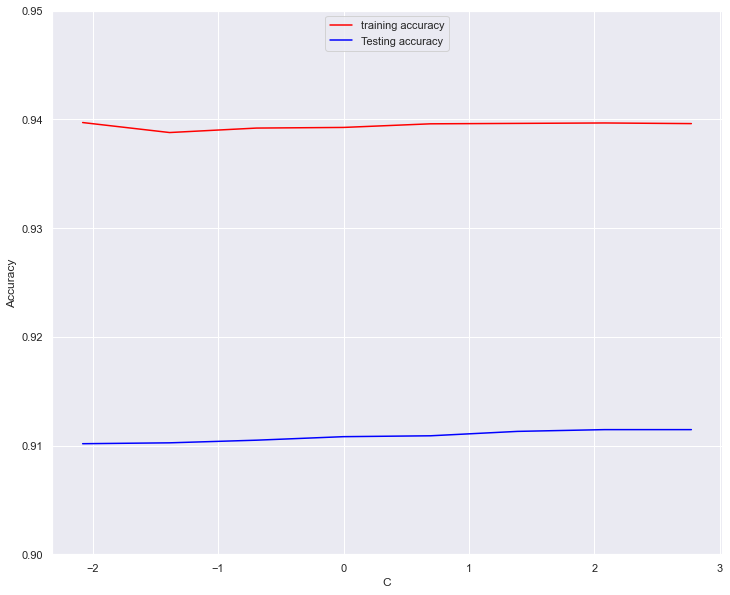

In [63]:
plt.plot(np.log(np.array(cs)), accTrain, color='red', label='training accuracy')
plt.plot(np.log(np.array(cs)), accTest, color='blue', label='Testing accuracy')
plt.legend(loc='upper center')
plt.ylim(0.9, 0.95)
plt.xlabel('C')
plt.ylabel('Accuracy');

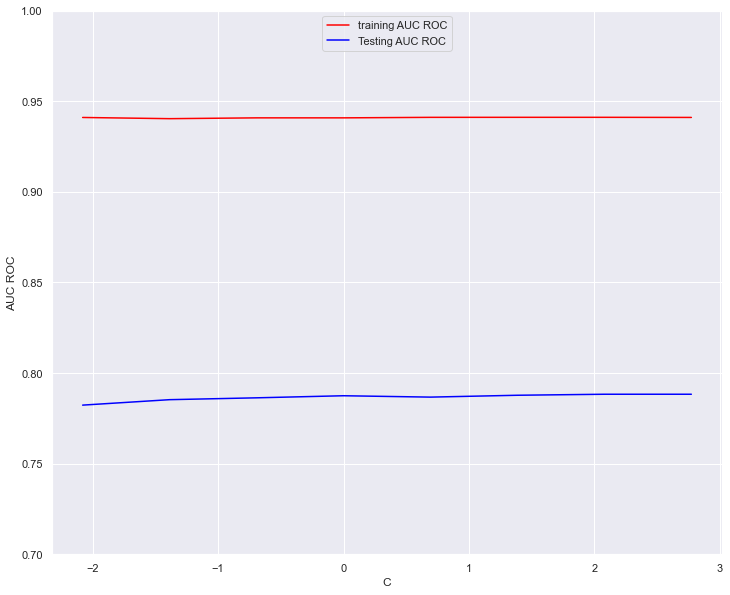

In [66]:
plt.plot(np.log(np.array(cs)), rocTrain, color='red', label='training AUC ROC')
plt.plot(np.log(np.array(cs)), rocTest, color='blue', label='Testing AUC ROC')
plt.legend(loc='upper center')
plt.ylim(0.7, 1)
plt.xlabel('C')
plt.ylabel('AUC ROC');

## Random Forest implementation

In [37]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForest=predictAndAccu(RandomForestClassifier(),X_train_SMOTE,X_test,y_train_SMOTE,y_test,"Random Forest")

Model-Random Forest
Training performance metrices
[[25596     0]
 [    0 25596]]
Accuracy:  1.0
The True Positive Rate is: 1.0
The Precision is: 1.0
The False positive rate is: 0.0
The False Negative Rate is:  0.0
F1 Scoref1_score : 1.0
ROC AUC Score : 1.0
Testing performance metrices
[[10310   642]
 [  487   918]]
Accuracy:  0.9086347819049931
The True Positive Rate is: 0.7973806763385488
The Precision is: 0.771678208334224
The False positive rate is: 0.20261932366145122
The False Negative Rate is:  0.20261932366145122
F1 Scoref1_score : 0.6192242833052277
ROC AUC Score : 0.7973806763385488


In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

model_gnb = GaussianNB()
 
result_gnb = model_gnb.fit(X_train_SMOTE,y_train_SMOTE)
y = result_gnb.predict(X_test)

model_gnb=predictAndAccu(GaussianNB(),X_train_SMOTE,X_test,y_train_SMOTE,y_test, "Naïve Bayes")

Model-Naïve Bayes
Training performance metrices
[[16654  8907]
 [ 2994 22567]]
Accuracy:  0.7672039435076875
The True Positive Rate is: 0.7672039435076875
The Precision is: 0.782311294918157
The False positive rate is: 0.2327960564923125
The False Negative Rate is:  0.2327960564923125
F1 Scoref1_score : 0.7913386517050933
ROC AUC Score : 0.7672039435076874
Testing performance metrices
[[7136 3851]
 [ 370 1000]]
Accuracy:  0.6584122359796067
The True Positive Rate is: 0.6897109324291018
The Precision is: 0.5784245825355795
The False positive rate is: 0.31028906757089836
The False Negative Rate is:  0.31028906757089836
F1 Scoref1_score : 0.32149172158816913
ROC AUC Score : 0.6897109324291015


## Naive Bayes implementation

In [69]:
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=25)}

gnb_ht = GaussianNB()
gnb_random = GridSearchCV(gnb_ht, param_grid, cv = 3, refit = True, verbose = 3)

gnb_random.fit(X_train_SMOTE,y_train_SMOTE)

#Best parameters
print(gnb_random.best_params_)
bestgnb = gnb_random.best_estimator_

model_gnb_best=predictAndAccu(bestgnb,X_train_SMOTE,X_test,y_train_SMOTE,y_test, "Naïve Bayes: Hyperparameter Tuning")

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END .................var_smoothing=1.0;, score=0.747 total time=   0.0s
[CV 2/3] END .................var_smoothing=1.0;, score=0.741 total time=   0.0s
[CV 3/3] END .................var_smoothing=1.0;, score=0.745 total time=   0.0s
[CV 1/3] END ..var_smoothing=0.4216965034285822;, score=0.778 total time=   0.0s
[CV 2/3] END ..var_smoothing=0.4216965034285822;, score=0.773 total time=   0.0s
[CV 3/3] END ..var_smoothing=0.4216965034285822;, score=0.775 total time=   0.0s
[CV 1/3] END ..var_smoothing=0.1778279410038923;, score=0.781 total time=   0.0s
[CV 2/3] END ..var_smoothing=0.1778279410038923;, score=0.791 total time=   0.0s
[CV 3/3] END ..var_smoothing=0.1778279410038923;, score=0.790 total time=   0.0s
[CV 1/3] END .var_smoothing=0.07498942093324558;, score=0.782 total time=   0.0s
[CV 2/3] END .var_smoothing=0.07498942093324558;, score=0.788 total time=   0.0s
[CV 3/3] END .var_smoothing=0.07498942093324558;

## KNN implemetation

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=27)
knn_model = knn.fit(X_train, y_train)

knn_predict_train = knn.predict(X_train)
knn_predict_test = knn.predict(X_test)

print("Train")
performMetrices(knn_predict_train, y_train)

print("Test")
performMetrices(knn_predict_test, y_test)


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
K:\Users\Akash\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train
[[25030  1941]
 [  588  1272]]
Accuracy:  0.9122819187679928
The True Positive Rate is: 0.805952390919279
The Precision is: 0.6864695392821297
The False positive rate is: 0.1940476090807211
The False Negative Rate is:  0.1940476090807211
F1 Scoref1_score : 0.5014784151389711
ROC AUC Score : 0.805952390919279
Test
[[10671   929]
 [  259   498]]
Accuracy:  0.9038601602330663
The True Positive Rate is: 0.7888868833416844
The Precision is: 0.6626438167070694
The False positive rate is: 0.21111311665831548
The False Negative Rate is:  0.21111311665831548
F1 Scoref1_score : 0.4560439560439561
ROC AUC Score : 0.7888868833416846


(0.9038601602330663, 0.7888868833416846)

In [24]:
knn = KNeighborsClassifier(n_neighbors=2)
knn_model = knn.fit(X_train_SMOTE, y_train_SMOTE)

knn_predict_train = knn.predict(X_train_SMOTE)
knn_predict_test = knn.predict(X_test)

print("Train")
performMetrices(knn_predict_train, y_train_SMOTE)

print("Test")
performMetrices(knn_predict_test, y_test)


K:\Users\Akash\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
K:\Users\Akash\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train
[[25618   320]
 [    0 25298]]
Accuracy:  0.9937543914435163
The True Positive Rate is: 0.9938314442131235
The Precision is: 0.9937543914435163
The False positive rate is: 0.006168555786876397
The False Negative Rate is:  0.006168555786876397
F1 Scoref1_score : 0.9937151386597534
ROC AUC Score : 0.9938314442131235
Test
[[10088   670]
 [  842   757]]
Accuracy:  0.8776402039329935
The True Positive Rate is: 0.7055708269983296
The Precision is: 0.7267239251374134
The False positive rate is: 0.29442917300167043
The False Negative Rate is:  0.29442917300167043
F1 Scoref1_score : 0.5003304692663582
ROC AUC Score : 0.7055708269983296


(0.8776402039329935, 0.7055708269983296)